In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

### Loading and preliminary understanding of the data

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
train_df.head(4)

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000


In [4]:
train_df.shape

(188533, 13)

In [7]:
# 

def basic_exploration(df: pd.DataFrame):

    print("\n =====BASIC PRE-EXPLORATION=====")
    print(f"\n Shape: {df.shape}")
    print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns")

    print("*"*50)
    print("\n Column names and Data Types ")
    print(f"\n{df.info()}")
    print("*"*50)

    return df.describe(include='all')

In [8]:
basic_exploration(train_df)


 =====BASIC PRE-EXPLORATION=====

 Shape: (188533, 13)
The dataset has 188533 rows and 13 columns
**************************************************

 Column names and Data Types 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB

None
******

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,188533.000000,188533,188533,188533.000000,188533.000000,183450,188533,188533,188533,188533,186081,167114,1.885330e+05
unique,NaN,57,1897,NaN,NaN,7,1117,52,319,156,2,1,NaN
top,NaN,Ford,F-150 XLT,NaN,NaN,Gasoline,355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,NaN
freq,NaN,23088,2945,NaN,NaN,165940,3462,49904,48658,107674,144514,167114,NaN
mean,94266.000000,NaN,NaN,2015.829998,65705.295174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.387802e+04
std,54424.933488,NaN,NaN,5.660967,49798.158076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.881952e+04
min,0.000000,NaN,NaN,1974.000000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+03
25%,47133.000000,NaN,NaN,2013.000000,24115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.700000e+04
50%,94266.000000,NaN,NaN,2017.000000,57785.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.082500e+04
75%,141399.000000,NaN,NaN,2020.000000,95400.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.990000e+04


In [10]:
train_df.dtypes

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [16]:
def missing_values_analysis(df: pd.DataFrame):
    print("\n ***** MISSING VALUES ANALYSIS *****")
    missing_values = pd.DataFrame(
        {
            "Missing values": df.isna().sum(),
            "Percentage": (df.isna().sum() / len(df)).round(3)
        }
    ).sort_values("Percentage", ascending=False)

    missing_values = missing_values[missing_values["Missing values"] > 0]

    plt.figure(figsize=(10,6))
    sns.barplot(x=missing_values.index, y='Percentage', data=missing_values, color='magenta')
    plt.title("Missing values percentage per column")
    plt.xlabel("Columns name")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return missing_values


 ***** MISSING VALUES ANALYSIS *****


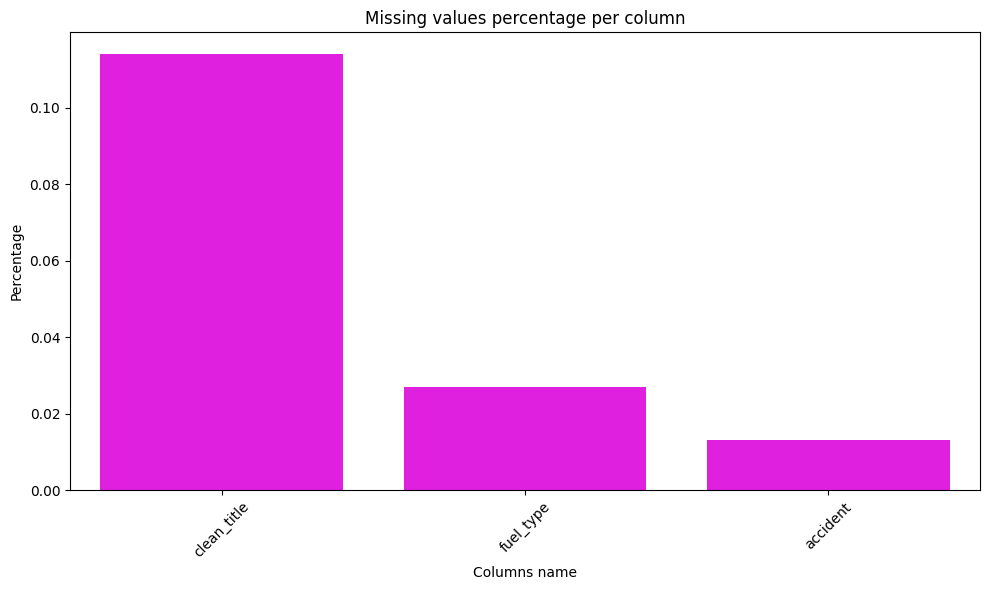

,Missing values,Percentage
clean_title,21419,0.114
fuel_type,5083,0.027
accident,2452,0.013


In [17]:
missing_values_analysis(train_df)

In [7]:
train_df.nunique()

id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64

In [8]:
# Columns you're interested in checking unique values
#columns_to_check = ['brand', 'model_year', 'transmission']

# Get the unique values for each column and store them in a DataFrame
#unique_values_dict = {col: train_df[col].unique() for col in columns_to_check}
#unique_values_df = pd.DataFrame(dict([(k, pd.Series(v)) for k,v in unique_values_dict.items()]))

# Display the unique values DataFrame
#print(unique_values_df)

In [9]:
train_df['model'].unique()

array(['Cooper S Base', 'LS V8', 'Silverado 2500 LT', ..., 'e-Golf SE',
       'Integra w/A-Spec Tech Package', 'IONIQ Plug-In Hybrid SEL'],
      dtype=object)

In [ ]:
def numeric_visualization(df: pd.DataFrame):

    num_variables = df.select_dtypes(include=['float64', 'int64']).columns
    num_variables = [col for col in num_variables if 'id' not in col.lower()]

    for column in num_variables:

        plt.figure(figsize=(12,6))
     
      

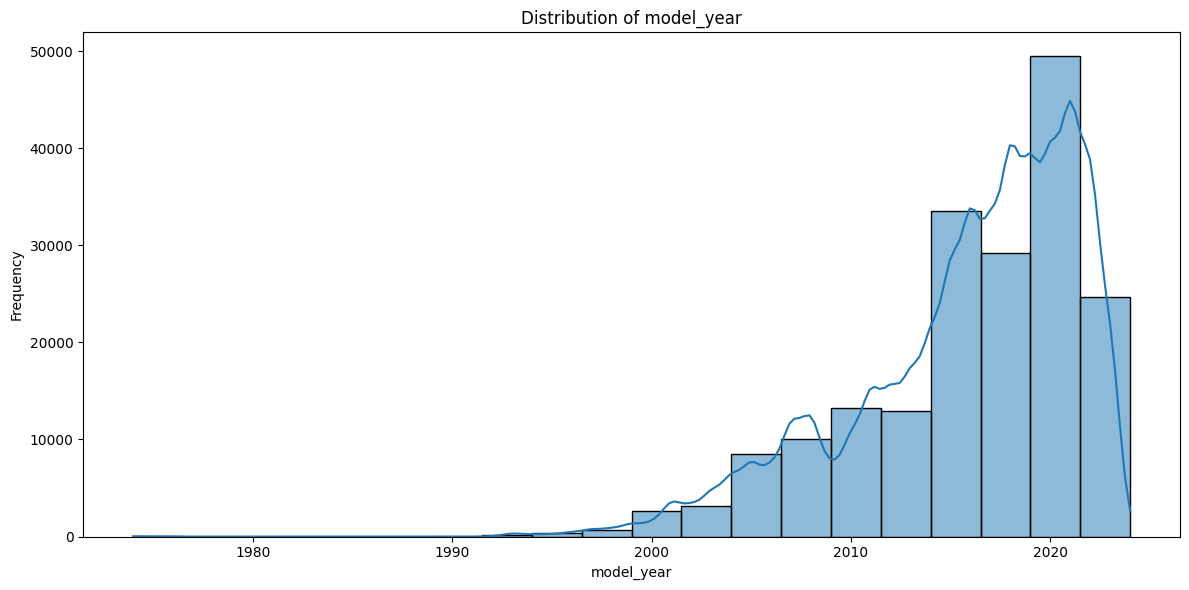

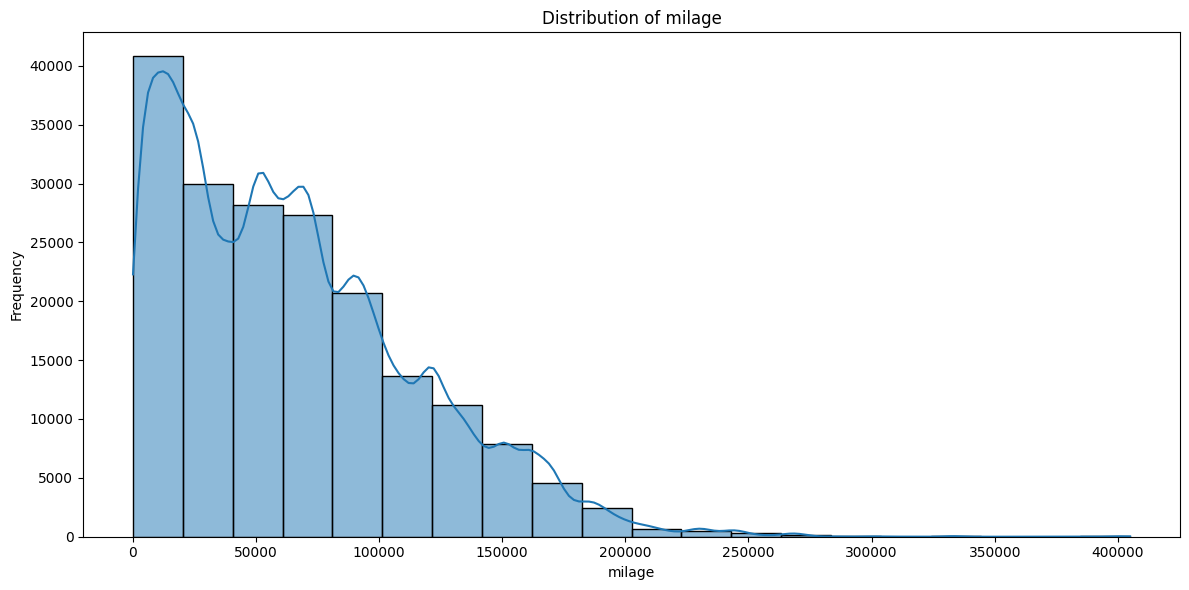

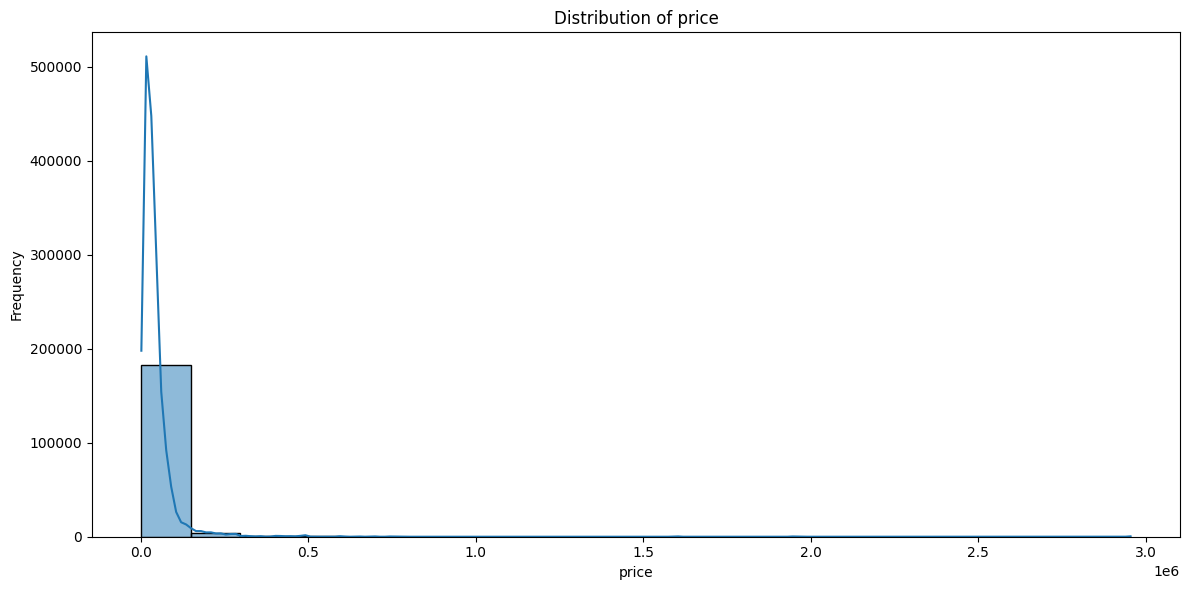

In [26]:
numeric_visualization(train_df)

In [11]:
train_df[['accident', 'clean_title', 'fuel_type']]

,accident,clean_title,fuel_type
0,None reported,Yes,Gasoline
1,At least 1 accident or damage reported,Yes,Gasoline
2,None reported,Yes,E85 Flex Fuel
3,None reported,Yes,Gasoline
4,None reported,Yes,Gasoline
...,...,...,...
188528,None reported,Yes,Gasoline
188529,At least 1 accident or damage reported,Yes,Gasoline
188530,None reported,Yes,Gasoline
188531,None reported,NaN,Gasoline


In [12]:
train_df['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [13]:
train_df['fuel_type'].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64

In [14]:
train_df.groupby('model_year').size()

model_year
1974       12
1992       14
1993      140
1994       92
1995      102
1996      189
1997      312
1998      343
1999      554
2000      558
2001     1534
2002     1282
2003     1906
2004     2570
2005     3129
2006     2814
2007     4876
2008     5156
2009     2716
2010     4235
2011     6265
2012     6095
2013     6796
2014     8415
2015    11389
2016    13696
2017    12794
2018    16414
2019    15409
2020    15848
2021    18198
2022    15749
2023     8769
2024      162
dtype: int64

In [15]:
train_df['model_year'].value_counts()

model_year
2021    18198
2018    16414
2020    15848
2022    15749
2019    15409
2016    13696
2017    12794
2015    11389
2023     8769
2014     8415
2013     6796
2011     6265
2012     6095
2008     5156
2007     4876
2010     4235
2005     3129
2006     2814
2009     2716
2004     2570
2003     1906
2001     1534
2002     1282
2000      558
1999      554
1998      343
1997      312
1996      189
2024      162
1993      140
1995      102
1994       92
1992       14
1974       12
Name: count, dtype: int64

In [16]:
train_df['accident'].value_counts()

accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64

In [17]:
train_df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [18]:
train_df['clean_title'].unique()

array(['Yes', nan], dtype=object)

In [19]:
percentage_null = train_df.isna().sum() / len(train_df)

In [20]:
percentage_null

id              0.000000
brand           0.000000
model           0.000000
model_year      0.000000
milage          0.000000
fuel_type       0.026961
engine          0.000000
transmission    0.000000
ext_col         0.000000
int_col         0.000000
accident        0.013006
clean_title     0.113609
price           0.000000
dtype: float64

In [21]:
# Data imputation
nan_column = []

for col in train_df.columns:
    if train_df[col].isna().sum() > 0:
        nan_column.append(col)
        
for col in nan_column:
    most_freq = train_df[col].mode()[0]
    train_df[col].fillna(most_freq, inplace=True)
    test_df[col].fillna(most_freq, inplace=True)

C:\Users\cocou\AppData\Local\Temp\ipykernel_2464\2571864273.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(most_freq, inplace=True)
C:\Users\cocou\AppData\Local\Temp\ipykernel_2464\2571864273.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [22]:
test_df.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64

In [23]:
train_df.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [24]:
# Drop useless column
train_df.drop('id', axis=1, inplace=True)

In [25]:
sample_id = test_df['id']

In [26]:
test_df.drop('id', axis=1, inplace=True)

In [27]:
train_df['model_year'].dtype

dtype('int64')

In [28]:
train_df['model_year'] = train_df['model_year'].astype(str)
test_df['model_year'] = test_df['model_year'].astype(str)

In [29]:
# Split data for training

X = train_df.drop('price', axis = 1)
y = train_df['price']

In [30]:
from feature_engine.encoding import RareLabelEncoder

for col in X.columns:
      if X[col].dtype == 'object':
            rare_encoder = RareLabelEncoder(tol=0.0001, n_categories=10, variables=[col])
            X = rare_encoder.fit_transform(X)
            test_df = rare_encoder.transform(test_df)

c:\Users\cocou\AppData\Local\Programs\Python\Python311\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable fuel_type is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Users\cocou\AppData\Local\Programs\Python\Python311\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable accident is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
c:\Users\cocou\AppData\Local\Programs\Python\Python311\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable clean_title is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


In [31]:
from sklearn.preprocessing import LabelEncoder

for col in X.columns:
      if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        test_df[col] = le.transform(test_df[col])

In [32]:
def removing_outliers_using_quarties(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    mask = (df[col] > lower_limit) & (df[col] < upper_limit)
    return mask

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X['milage'] = scaler.fit_transform(X[['milage']])
test_df['milage'] = scaler.transform(test_df[['milage']])

In [63]:
X

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,29,408,14,2.957842,2,71,35,243,56,1,0
1,26,765,9,1.557184,2,263,35,203,8,0,0
2,8,1295,9,1.426276,1,489,35,28,56,1,0
3,15,623,24,-0.927854,2,671,44,19,10,1,0
4,33,888,28,-1.171076,2,183,23,19,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...
188528,7,487,24,-0.335461,2,674,44,236,8,1,0
188529,33,171,25,-0.745116,2,593,28,236,10,0,0
188530,33,187,28,-1.045328,2,723,23,236,10,1,0
188531,3,1208,29,-1.040409,2,385,1,63,10,1,0


### Modeling

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,KFold , GridSearchCV , train_test_split , RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [36]:

dtree_regressor = DecisionTreeRegressor(max_depth=10, max_features='log2', min_samples_split=10)

dtree_regressor.fit(X, y)

DecisionTreeRegressor(max_depth=10, max_features='log2', min_samples_split=10)

In [37]:
# Create and train pipeline
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, y)

c:\Users\cocou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\cocou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\cocou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\cocou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [39]:
# Predict on test data
y_pred = dtree_regressor.predict(test_df)

In [40]:
y_pred = model.predict(test_df)

### Random Forest Regressor with Hyperparamter Tuning

In [41]:
r_forest = RandomForestRegressor()

In [42]:
r_forest.fit(X,y)

RandomForestRegressor()

In [43]:
# Hyperparameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

In [44]:
# Random search
random_search = RandomizedSearchCV(r_forest, param_distributions=param_grid, 
                                   n_iter=20, cv=5, scoring='neg_mean_squared_error', 
                                   n_jobs=-1, random_state=42)

In [45]:
sub_forest = r_forest.predict(test_df)

In [46]:
#prepare the submission
sub_df = pd.DataFrame({'id':sample_id,'price':sub_forest})
sub_df.head()

,id,price
0,188533,15382.01
1,188534,72650.26
2,188535,62918.95
3,188536,24670.24
4,188537,25126.06


In [47]:
sub_df.to_csv('prices_cars_project_based.csv',index=False)

### Implementaing 04 ensembles models (AdaBoost, LightGBM, XGBRegressor, GradientBoostingRegressor)

In [48]:
# Declaring and initializing the ensemble models
models_name = ['AdaBoost', 'LightGBM', 'XGBRegressor', 'GradientBoostingRegressor']

models = [AdaBoostRegressor(),
                  LGBMRegressor(),
                  XGBRegressor(),
                  GradientBoostingRegressor()]

In [49]:
# Perform the cross-validation

cv = KFold(n_splits=10, shuffle=True, random_state=21)

In [50]:
# 
errors = {}
for models_name, models in zip(models_name, models):
    scores = cross_val_score(models, X, y, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    errors[models_name] = np.sqrt(-scores).mean()



In [51]:
errors

{'AdaBoost': 74165.96714531703,
 'LightGBM': 72843.59784322252,
 'XGBRegressor': 75054.7685148536,
 'GradientBoostingRegressor': 72862.01424989228}

 LightGBM Regressor is the best performing model, let's proceed with that

In [52]:
! pip install skopt

ERROR: Could not find a version that satisfies the requirement skopt (from versions: none)
ERROR: No matching distribution found for skopt


In [53]:
# Define the parameter grid
param_grid = {
    'num_leaves': [31, 127],
    'max_depth': [-1, 5, 10],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'min_child_samples': [20, 50],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the LightGBM model
lgb = LGBMRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=lgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

In [54]:
#random_search = RandomizedSearchCV(lgb, param_distributions=param_grid, 
  #                                 n_iter=20, cv=5, scoring='neg_mean_squared_error', 
#                                  n_jobs=-1, random_state=42)

In [58]:
# Hyperparameter tuning LGBM Regressor
lgbm = LGBMRegressor(colsample_bytree = 0.8, learning_rate =  0.1, max_depth = 5, min_child_samples = 50, n_estimators = 100, num_leaves = 127, subsample = 0.8)

In [59]:
lgbm.fit(X,y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1277
[LightGBM] [Info] Number of data points in the train set: 188533, number of used features: 10
[LightGBM] [Info] Start training from score 43878.016178
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

LGBMRegressor(colsample_bytree=0.8, max_depth=5, min_child_samples=50,
              num_leaves=127, subsample=0.8)

In [57]:
# Fit the grid search
# grid_search.fit(X, y)

# Print the best parameters and score
# print("Best parameters:", grid_search.best_params_)
# print("Best RMSE:", np.sqrt(-grid_search.best_score_))

Fitting 5 folds for each of 192 candidates, totalling 960 fits


c:\Users\cocou\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1277
[LightGBM] [Info] Number of data points in the train set: 188533, number of used features: 10
[LightGBM] [Info] Start training from score 43878.016178
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## Final Submission

In [60]:
sub = lgbm.predict(test_df)
sub

array([18121.68425868, 79258.84963161, 56596.58535461, ...,
       24318.55839247, 15528.86778506, 34412.56302413])

In [61]:
#prepare the submission
sub_df = pd.DataFrame({'id':sample_id,'price':sub})
sub_df.head()

,id,price
0,188533,18121.684259
1,188534,79258.849632
2,188535,56596.585355
3,188536,21725.062291
4,188537,29036.203416


In [62]:
sub_df.to_csv('prices_cars_project_based.csv',index=False)